In [1]:
!wget https://ailb-web.ing.unimore.it/publicfiles/drive/CVPR%202019%20-%20Art2Real/datasets/landscape2photo.zip

--2024-09-23 18:42:16--  https://ailb-web.ing.unimore.it/publicfiles/drive/CVPR%202019%20-%20Art2Real/datasets/landscape2photo.zip
Resolving ailb-web.ing.unimore.it (ailb-web.ing.unimore.it)... 155.185.49.86
Connecting to ailb-web.ing.unimore.it (ailb-web.ing.unimore.it)|155.185.49.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 136168938 (130M) [application/zip]
Saving to: ‘landscape2photo.zip’

landscape2photo.zip 100%[===================>] 129.86M  9.86MB/s    in 13s     

2024-09-23 18:42:31 (10.4 MB/s) - ‘landscape2photo.zip’ saved [136168938/136168938]



In [2]:
!unzip landscape2photo.zip

Streaming output truncated to the last 5000 lines.
  inflating: landscape2photo/testA/32164.jpg  
  inflating: landscape2photo/testA/32169.jpg  
  inflating: landscape2photo/testA/32173.jpg  
  inflating: landscape2photo/testA/3221.jpg  
  inflating: landscape2photo/testA/32235.jpg  
  inflating: landscape2photo/testA/32239.jpg  
  inflating: landscape2photo/testA/32252.jpg  
  inflating: landscape2photo/testA/32267.jpg  
  inflating: landscape2photo/testA/3230.jpg  
  inflating: landscape2photo/testA/32376.jpg  
  inflating: landscape2photo/testA/3238.jpg  
  inflating: landscape2photo/testA/32386.jpg  
  inflating: landscape2photo/testA/32441.jpg  
  inflating: landscape2photo/testA/32449.jpg  
  inflating: landscape2photo/testA/32461.jpg  
  inflating: landscape2photo/testA/32485.jpg  
  inflating: landscape2photo/testA/32511.jpg  
  inflating: landscape2photo/testA/32538.jpg  
  inflating: landscape2photo/testA/32581.jpg  
  inflating: landscape2photo/testA/32597.jpg  
  inflating:

In [2]:
!pip install segment-anything

In [3]:
!wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

In [17]:
import torch
CHECKPOINT_PATH='/content/sam_vit_h_4b8939.pth'

DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
MODEL_TYPE = "vit_h"


In [18]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor
sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH).to(device=DEVICE)
sam.eval()
mask_generator = SamAutomaticMaskGenerator(sam)


/usr/local/lib/python3.10/dist-packages/segment_anything/build_sam.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f)


In [19]:
import cv2


# Give the path of your image
IMAGE_PATH= '/content/landscape2photo/trainB/2013-11-10 00_51_18.jpg'
# Read the image from the path
image= cv2.imread(IMAGE_PATH)
# Convert to RGB format
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


# Generate segmentation mask
output_mask = mask_generator.generate(image_rgb)
print(output_mask)

[{'segmentation': array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), 'area': 46805, 'bbox': [0, 0, 255, 190], 'predicted_iou': 1.049628496170044, 'point_coords': [[100.0, 132.0]], 'stability_score': 0.9903281927108765, 'crop_box': [0, 0, 256, 256]}, {'segmentation': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), 'area': 166, 'bbox': [141, 140, 17, 13], 'predicted_iou': 1.0195411443710327, 'point

In [7]:
import matplotlib.pyplot as plt
import numpy as np

In [8]:
def show_output(result_dict,axes=None):
     if axes:
        ax = axes
     else:
        ax = plt.gca()
        ax.set_autoscale_on(False)
     sorted_result = sorted(result_dict, key=(lambda x: x['area']), reverse=True)
     # Plot for each segment area
     for val in sorted_result:
        mask = val['segmentation']
        img = np.ones((mask.shape[0], mask.shape[1], 3))
        color_mask = np.random.random((1, 3)).tolist()[0]
        for i in range(3):
            img[:,:,i] = color_mask[i]
            ax.imshow(np.dstack((img, mask*0.5)))

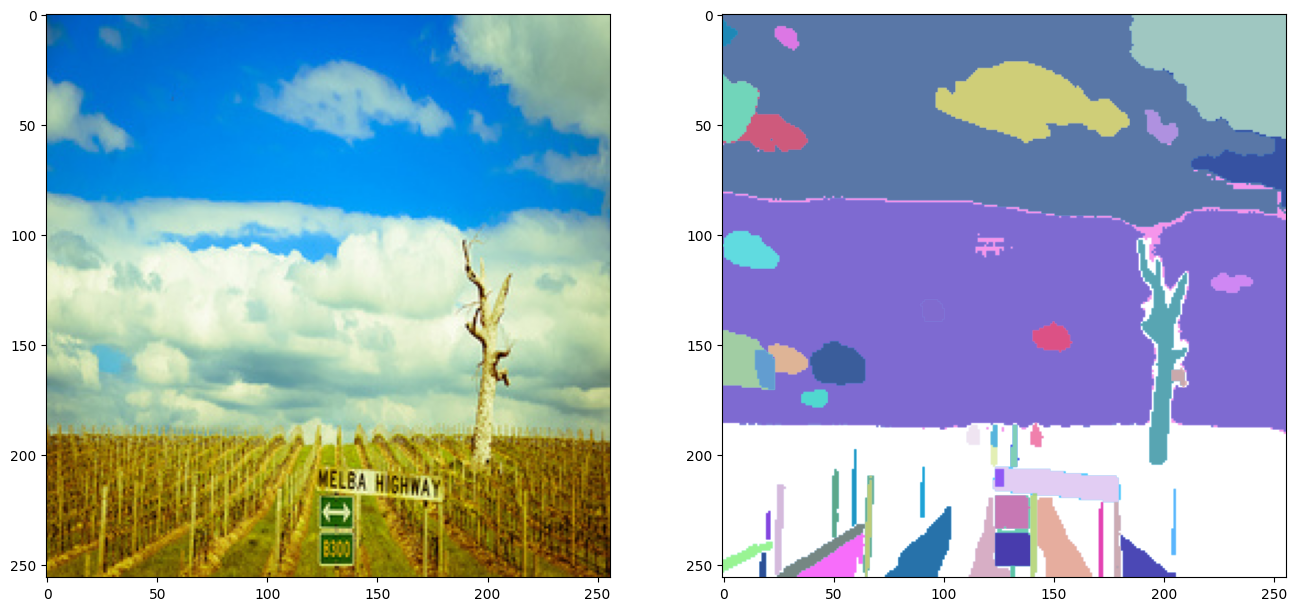

In [9]:
_,axes = plt.subplots(1,2, figsize=(16,16))
axes[0].imshow(image_rgb)
show_output(output_mask, axes[1])

In [35]:
import supervision as sv

mask_annotator = sv.MaskAnnotator(color_lookup = sv.ColorLookup.INDEX)
detections = sv.Detections.from_sam(output_mask)
annotated_image = mask_annotator.annotate(image, detections)

AttributeError: module 'supervision' has no attribute 'ColorLookup'

In [29]:
!pip install supervision==0.5.0

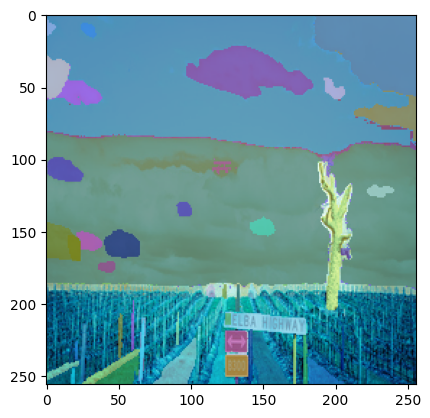

In [33]:
plt.imshow(annotated_image)

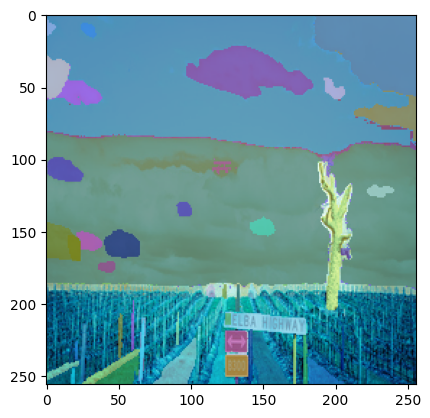

In [24]:
plt.imshow(annotated_image)